### Explanation:

- By observation of the input, it's roughly a convex polygon. 
- Pick the 2 points (the crosses) in the middle to split into the upper and above regions
- (these points found via manhattan distance, then observing their surrounding points)

- By observation, it's guaranteed the largest possible rectangle occurs within parts where the candidate points on circle won't have any concave parts.
- Hence, no need to check the edges of the rectangle are within the circle -- only need to check the corner points

- These points (the triangles) indicate the maximum (minimum) y-coordinate such that the upper (below) rectangle are within the circle
- Use these points to bound the remaining candidate points


In [ ]:
coords = []
with open("inputs/day12.txt", "r") as file:
    for line in file:
        x, y = line.split(",")
        coords.append((int(x), int(y)))
len(coords)

496

In [3]:
def dist(a, b):
    return abs(b[0] - a[0]) + abs(b[1] - a[1])


max_diff_coord = [dist(coords[i], coords[i + 1]) for i in range(len(coords) - 1)]
max_diff_val = max(max_diff_coord)
max_diff = max_diff_coord.index(max_diff_val)

coords[max_diff - 2], coords[max_diff - 1], coords[max_diff], coords[max_diff + 1]

((1874, 50137), (94901, 50137), (94901, 48623), (1544, 48623))

In [4]:
c_above = (94901, 50137)
c_down = (94901, 48623)

higher_than_top = [c for c in coords if c[1] > c_above[1]]
lower_than_down = [c for c in coords if c[1] < c_down[1]]

In [5]:
# Find the bounding x coordinate, i.e. the diagonal cannot have a y coordinate higher than this
all_points_above = [c for c in higher_than_top if c[0] >= c_above[0]]
bounding_point_above = min(all_points_above, key=lambda c: (c[0], -c[1]))

# Find the bounding x coordinate, i.e. the diagonal cannot have a y coordinate lower than this
all_points_below = [c for c in lower_than_down if c[0] >= c_down[0]]
bounding_point_below = min(all_points_below, key=lambda c: (c[0], c[1]))

In [6]:
candidates_above = [c for c in higher_than_top if c[1] <= bounding_point_above[1]]
candidates_below = [c for c in lower_than_down if c[1] >= bounding_point_below[1]]

In [7]:
def rect_area(c1, c2):
    width = abs(c2[0] - c1[0]) + 1
    height = abs(c2[1] - c1[1]) + 1
    return width * height


best_c_above = max(candidates_above, key=lambda c: rect_area(c_above, c))
best_c_below = max(candidates_below, key=lambda c: rect_area(c_down, c))

best_area_above = max(rect_area(c_above, c) for c in candidates_above)
best_area_below = max(rect_area(c_down, c) for c in candidates_below)
max(best_area_above, best_area_below)

1560299548

In [8]:
# bounding_point_above, bounding_point_below
print("c_above:", c_above)
print("bounding_point_above:", bounding_point_above)
print("best_c_above:", best_c_above)
print("=========")
print("c_down:", c_down)
print("bounding_point_below:", bounding_point_below)
print("best_c_below:", best_c_below)

c_above: (94901, 50137)
bounding_point_above: (95192, 67838)
best_c_above: (5548, 67598)
c_down: (94901, 48623)
bounding_point_below: (95040, 33475)
best_c_below: (3992, 34479)


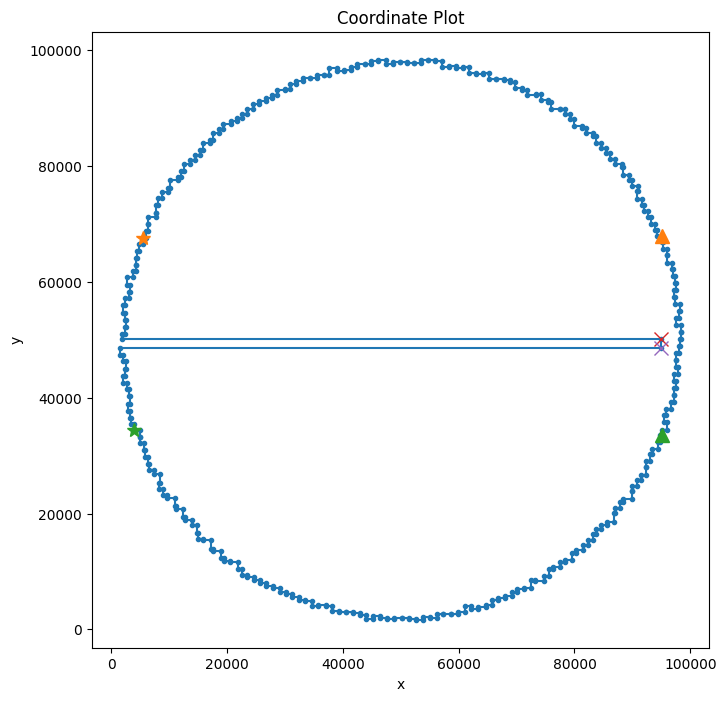

In [13]:
import matplotlib.pyplot as plt

xs, ys = zip(*coords)
plt.figure(figsize=(8, 8))
plt.plot(xs, ys, linestyle="-", marker="o", markersize=3, color="C0")
# plt.xlim(94_000, 96_000)
# plt.ylim(50_000, 70_000)

plt.plot(c_above[0], c_above[1], marker="x", markersize=10, color="C3")
plt.plot(c_down[0], c_down[1], marker="x", markersize=10, color="C4")
plt.plot(
    bounding_point_above[0],
    bounding_point_above[1],
    marker="^",
    markersize=10,
    color="C1",
)
plt.plot(
    bounding_point_below[0],
    bounding_point_below[1],
    marker="^",
    markersize=10,
    color="C2",
)
plt.plot(best_c_above[0], best_c_above[1], marker="*", markersize=10, color="C1")
plt.plot(best_c_below[0], best_c_below[1], marker="*", markersize=10, color="C2")

plt.gca().set_aspect("equal", "box")
plt.title("Coordinate Plot")
plt.xlabel("x")
plt.ylabel("y")
plt.show()